In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.regression.interval_based import TimeSeriesForestRegressor
from sktime.split import temporal_train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
csv_path = os.path.join(notebook_dir, '..', 'data/')

In [3]:
def load_exchange_data(filename):
    """Load currency exchange data from csv file"""
    full_path = os.path.join(csv_path, filename)
    df = pd.read_csv(full_path)
    return df

df_vnd = load_exchange_data('vnd_data_clean.csv')
df_brl = load_exchange_data('brl_data_clean.csv')
df_hnl = load_exchange_data('hnl_data_clean.csv')
df_idr = load_exchange_data('idr_data_clean.csv')
df_cop = load_exchange_data('cop_data_clean.csv')

# Load commodity prices data
commodity_path = os.path.join(csv_path, 'commodity_prices_clean.csv')
df_commodity = pd.read_csv(commodity_path)


merged_df = df_brl.copy()
for df in [df_vnd, df_hnl, df_idr, df_commodity, df_cop]:
    merged_df = pd.merge(merged_df, df, on="Date", how="inner")
    

imputer = IterativeImputer(random_state=42)
merged_df.iloc[:, 1:] = imputer.fit_transform(merged_df.iloc[:, 1:])

merged_df["Date"] = pd.to_datetime(merged_df["Date"], errors="coerce", format="%m/%Y")
merged_df["Date"] = pd.PeriodIndex(merged_df["Date"], freq="M")

In [4]:
merged_df

,Date,brl Exchange Rate,vnd Exchange Rate,hnl Exchange Rate,idr Exchange Rate,Coffee,Milk,Sugar,Tea,cop Exchange Rate
0,1990-01,0.000006,5479.329529,2.0000,1804.850000,0.758300,0.042733,0.142000,1.147273,440.08
1,1990-02,0.000010,5479.329529,2.0000,1809.870000,0.840100,0.056185,0.146500,0.958396,451.72
2,1990-03,0.000016,5479.329529,4.0000,1820.350000,0.939600,0.071089,0.153100,0.873620,463.40
3,1990-04,0.000021,5479.329529,4.0000,1826.050000,0.937300,0.070584,0.152400,0.883644,474.62
4,1990-05,0.000023,5563.430866,4.2000,1831.400000,0.920200,0.072768,0.146200,0.848309,485.99
...,...,...,...,...,...,...,...,...,...,...
414,2024-07,5.541448,24251.560000,24.8582,16261.652826,2.570987,0.242129,0.193517,1.363518,4036.80
415,2024-08,5.552014,24245.850000,24.8826,15793.181818,2.614377,0.244700,0.184195,1.467152,4062.98
416,2024-09,5.540967,24163.540000,24.8381,15341.250000,2.787605,0.251466,0.206248,1.572990,4191.86
417,2024-10,5.623509,24192.520000,24.9661,15541.347826,2.767774,0.238592,0.223552,1.490232,4257.76


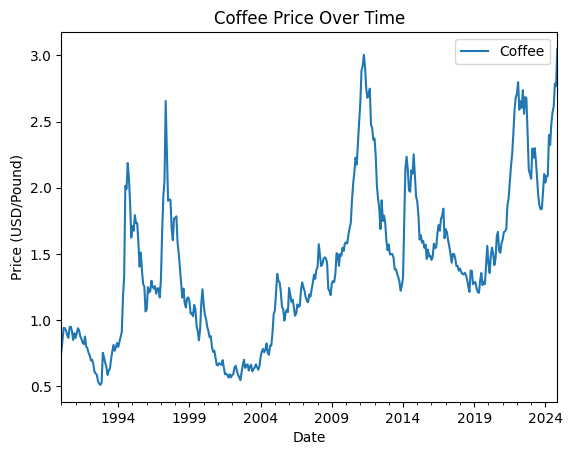

In [5]:
merged_df.plot(x='Date', y='Coffee', title='Coffee Price Over Time')  
plt.xlabel('Date')
plt.ylabel('Price (USD/Pound)')
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 276, Test size: 70


In [ ]:
regressor = TimeSeriesForestRegressor(
    n_estimators=100,
    min_interval=3,
    random_state=42
)

regressor.fit(X_train, y_train)

TimeSeriesForestRegressor(n_estimators=100, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.0132504 ,  0.00749461,  0.0089995 ,  0.01279491, -0.02109527,
        0.01402713, -0.00143451,  0.0169514 ,  0.00483641,  0.00035821,
       -0.00176511,  0.00152765, -0.00322629, -0.00057768, -0.00360037,
       -0.00803253, -0.01854024, -0.01204709, -0.01651216,  0.00143469,
       -0.00715348, -0.00862164, -0.00675753, -0.02527761, -0.00247504,
       -0.00682822, -0.00195342,  0.02252926,  0.02256916,  0.03532852,
        0.032719  ,  0.04243542,  0.04720987,  0.05716074,  0.06215201,
        0.04640621,  0.04745259,  0.03397151,  0.05966809,  0.04003015,
        0.00276459, -0.02029499, -0.02833932, -0.04159814, -0.07055147,
       -0.09681058, -0.06174916, -0.09504248, -0.06651356, -0.06531196,
       -0.046734  , -0.03227083, -0.04275048, -0.02760551, -0.02980042,
       -0.03281516, -0.02590592, -0.01709027, -0.01870534, -0.00300554,
       -0.00211769, -0.0099335 , -0.02524032, -0.0060331 ,  0.01224741,
        0.0039695 , -0.03066993,  0.00381741,  0.01081825,  0.02

In [ ]:
def print_metrics(y_true, y_pred):
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

print_metrics(y_test, y_pred)

MAE: 0.09
MSE: 0.01
RMSE: 0.11
R²: 0.05


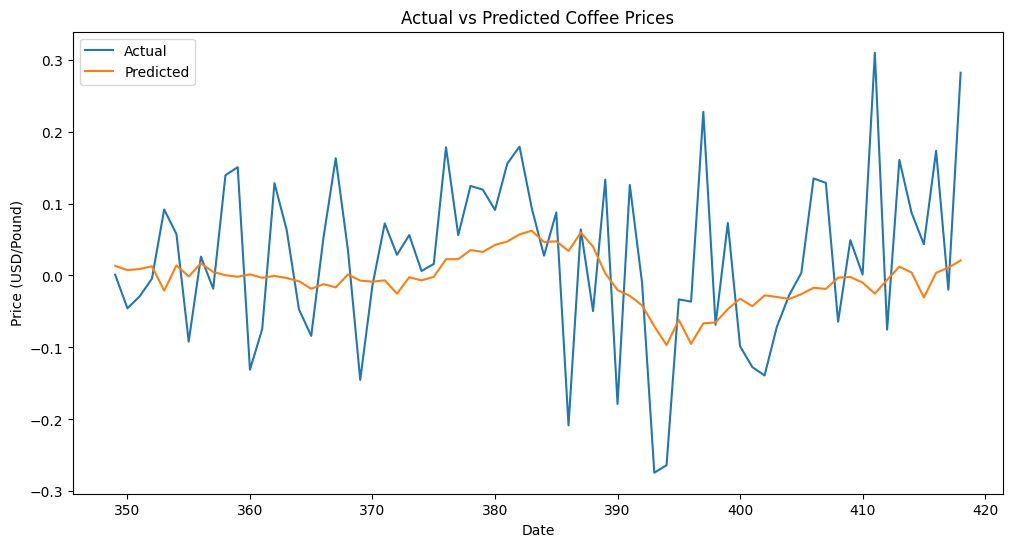

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index[-len(y_test):], y_test, label='Actual')
plt.plot(merged_df.index[-len(y_test):], y_pred, label='Predicted')
plt.title('Actual vs Predicted Coffee Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD/Pound)')
plt.legend()
plt.show()